<a href="https://colab.research.google.com/github/Lelytameyda29rpl/PCVK_Ganjil_2025/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**D. PRAKTIKUM**

# Langkah 1 - Import Folder yang Ada di Drive

In [ ]:
# Import library 'drive' dari modul 'google.colab'
# Library ini digunakan untuk mengakses Google Drive dari Google Colab
from google.colab import drive

# Mount Google Drive ke dalam environment Colab
# '/content/drive' adalah lokasi di Colab di mana Google Drive akan dihubungkan
# Setelah mount, bisa mengakses file di Google Drive seolah-olah berada di folder lokal
drive.mount('/content/drive')

Mounted at /content/drive


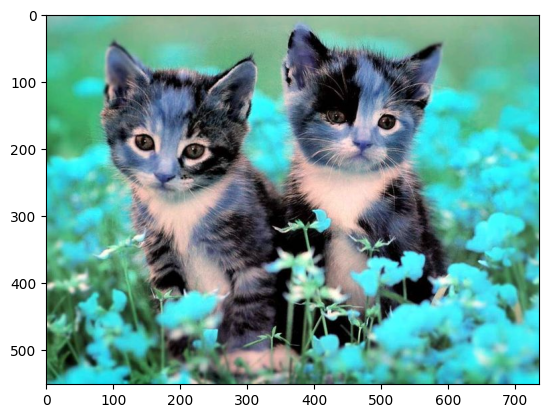

In [ ]:
# Import library OpenCV, digunakan untuk memproses citra
# cv2 adalah library populer untuk pengolahan gambar/video
import cv2 as cv

# Import fungsi cv2_imshow khusus Colab untuk menampilkan gambar dengan OpenCV
# Ini digunakan karena cv.imshow() tidak berjalan di Google Colab
from google.colab.patches import cv2_imshow

# Import modul io dari skimage untuk membaca citra dari URL atau file
# skimage.io bisa digunakan sebagai alternatif cv.imread
from skimage import io

# Import matplotlib untuk menampilkan citra
# plt.imshow digunakan untuk menampilkan citra di notebook
import matplotlib.pyplot as plt

# Import numpy, library untuk manipulasi array (citra juga dianggap sebagai array 2D/3D)
import numpy as np

# Membaca citra dari Google Drive menggunakan OpenCV
# Path sesuai dengan lokasi file di Google Drive setelah mount
# cv.imread membaca citra sebagai array NumPy dengan format BGR (Blue, Green, Red)
img = cv.imread('/content/drive/MyDrive/images/kitten.jpg')

# Menampilkan citra menggunakan matplotlib
# OpenCV membaca citra dalam format BGR, sedangkan matplotlib mengira formatnya RGB
# Akibatnya warna bisa tampak tidak sesuai (misal biru dan merah tertukar)
plt.imshow(img)  # Hasilnya citra dengan channel warna BGR


# Langkah 2 - OpenCV membaca image dan menyimpan dalam channel warna BGR (Blue Green Red) Tampilkan nilai pixel dan image

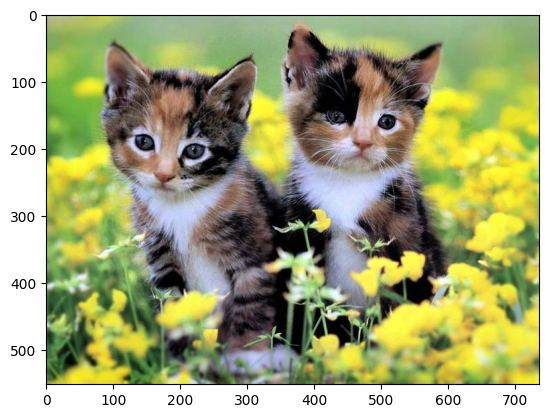

In [ ]:
# Membuat variabel baru 'img2' yang merujuk ke array citra yang sama dengan 'img'
img2 = img

# Mengonversi citra dari format BGR (OpenCV default) menjadi RGB
# OpenCV menggunakan BGR, tapi matplotlib mengharapkan RGB
# Sehingga warna akan tampil dengan benar di matplotlib
img3 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Menampilkan citra yang sudah dikonversi ke RGB menggunakan matplotlib
# Sekarang warna citra akan tampil natural, bukan terbalik antara merah dan biru
plt.imshow(img3)
plt.show()

# Langkah 3 - Menampilkan citra Grayscale, melakukan resizing, melakukan Flipping, Menyimpan citra hasil


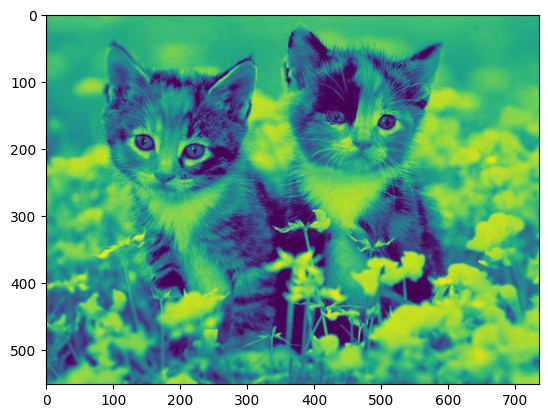

In [ ]:
# Membaca citra dari Google Drive dengan mode grayscale (abu-abu)
# cv.IMREAD_GRAYSCALE memberitahu OpenCV untuk membaca citra sebagai 2D array, bukan 3-channel BGR
img_gray = cv.imread('/content/drive/MyDrive/images/kitten.jpg', cv.IMREAD_GRAYSCALE)

# Menampilkan citra grayscale menggunakan matplotlib
# plt.imshow secara default mengira citra 2D sebagai colormap (warna)
plt.imshow(img_gray)
plt.show()

Dari citra grayscale, selanjutnya dipilih untuk ditampilkan colormap dengan warna ‘gray’

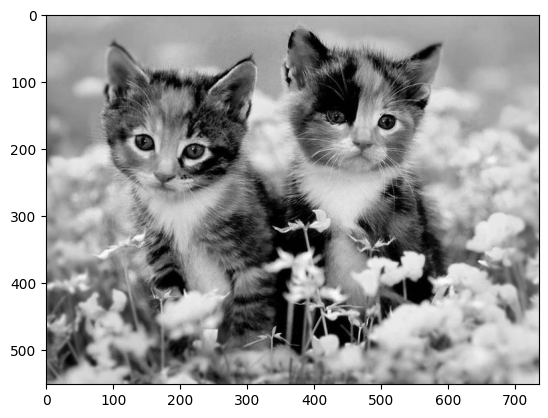

In [ ]:
# Menampilkan citra grayscale menggunakan matplotlib
# Parameter cmap='gray' memberi tahu matplotlib untuk menampilkan citra dalam skala abu-abu
plt.imshow(img_gray, cmap='gray')

Dari citra grayscale, selanjutnya dipilih untuk ditampilkan colormap dengan warna ‘magma’

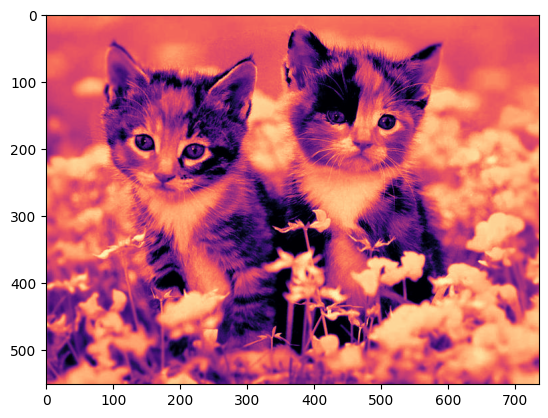

In [ ]:
# Menampilkan citra grayscale menggunakan matplotlib
# cmap='magma' memberi tahu matplotlib untuk menggunakan colormap 'magma' (gradasi warna dari gelap ke terang)
plt.imshow(img_gray, cmap='magma')

Citra RGB di resize dalam ukuran panjang 512 dan lebar 1024

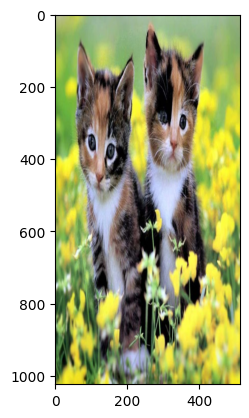

In [ ]:
# Mengonversi citra dari BGR ke RGB agar warna tampil benar di matplotlib
# Lalu melakukan resize citra menjadi ukuran baru (lebar=512, tinggi=1024)
# cv.resize(image, (width, height)) -> ukurannya dalam format (width, height)
img4 = cv.resize(cv.cvtColor(img, cv.COLOR_BGR2RGB), (512, 1024))

# Menampilkan citra hasil konversi dan resize menggunakan matplotlib
plt.imshow(img4)

Citra RGB ditampilkan dalam ukuran yang lebih besar dengan posisi gambar terbalik

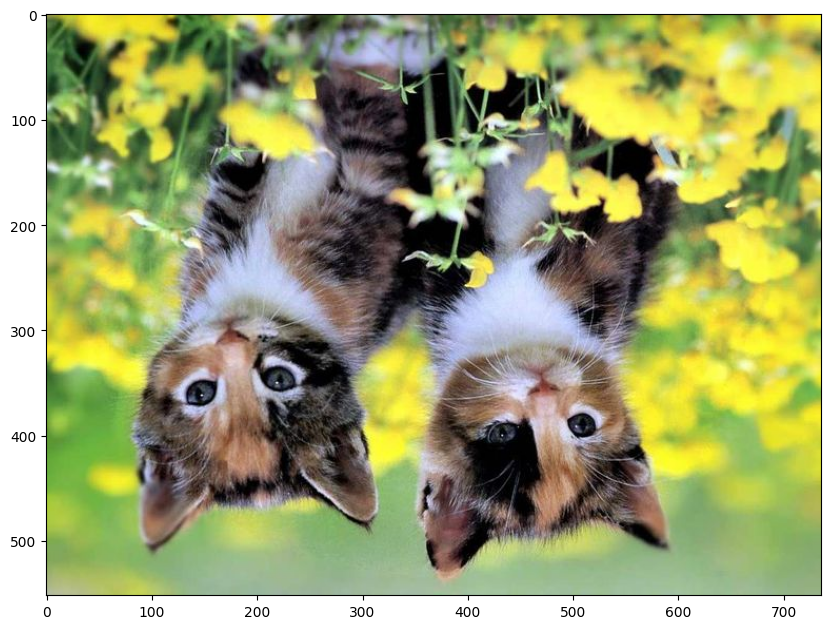

In [ ]:
# Mengonversi citra dari BGR ke RGB agar warna tampil benar di matplotlib
# Lalu membalik citra secara vertikal (flip axis=0)
# cv.flip(image, 0) -> flip secara vertikal; 1 -> horizontal; -1 -> keduanya
img5 = cv.flip(cv.cvtColor(img, cv.COLOR_BGR2RGB), 0)

# Menyimpan citra ke Google Drive (baris ini dikomentari)
# cv.imwrite(path, image) menyimpan array citra ke file image
# Pastikan tanda kutip dan path benar agar tidak error
# cv.imwrite('/content/drive/MyDrive/PCVK_MM/Images/mandrill2.tiff', img5)

# Membuat canvas plot matplotlib yang lebih besar
# figsize=(10,10) artinya ukuran canvas 10x10 inch, bisa diubah sesuai kebutuhan
fig = plt.figure(figsize=(10,10))

# Menambahkan subplot tunggal (1x1) pada figure
ax = fig.add_subplot(111)

# Menampilkan citra img5 di subplot
ax.imshow(img5)

# Langkah 4 - Membuat bentuk Geometri 2D dari OpenCV. Diawali dengan pembuatan black image dengan tipe data int16.

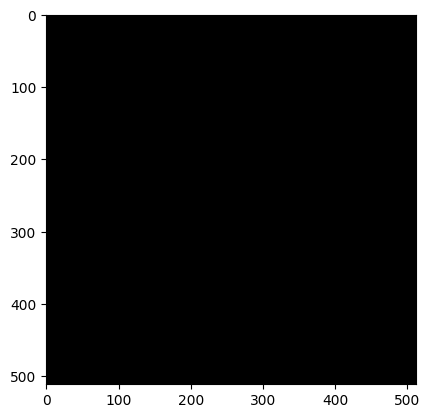

In [21]:
# Membuat array NumPy berukuran 512x512 dengan 3 channel (RGB), semua nilainya 0
# np.zeros(...) -> membuat citra hitam karena semua piksel bernilai 0
# dtype=np.int16 artinya setiap nilai piksel adalah integer 16-bit
black_img = np.zeros(shape=(512, 512, 3), dtype=np.int16)

# Menampilkan citra hitam menggunakan matplotlib
plt.imshow(black_img)

Kemudian menambahkan bentuk persegi panjang sesuai koordinat pt1 dan pt2

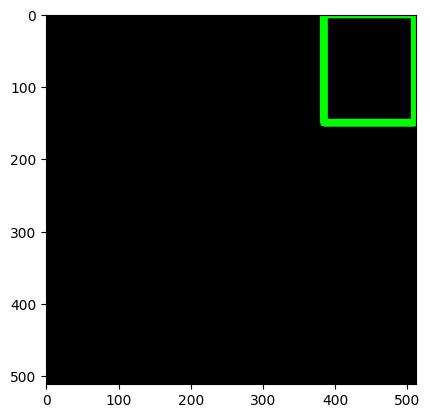

In [22]:
# Menggambar persegi panjang (rectangle) pada citra black_img menggunakan OpenCV
# pt1 = (384, 0) -> koordinat titik pojok kiri atas persegi panjang
# pt2 = (510, 150) -> koordinat titik pojok kanan bawah persegi panjang
# color = (0, 255, 0) -> warna persegi panjang dalam format RGB (hijau)
# thickness = 10 -> ketebalan garis persegi panjang, jika -1 maka akan terisi penuh
cv.rectangle(black_img, pt1=(384, 0), pt2=(510, 150), color=(0, 255, 0), thickness=10)

# Menampilkan citra setelah digambar persegi panjang
plt.imshow(black_img)

Selanjutnya ditambah menambahkan bentuk persegi sesuai koordinat pt1 dan pt2
yang tertulis pada kode program.

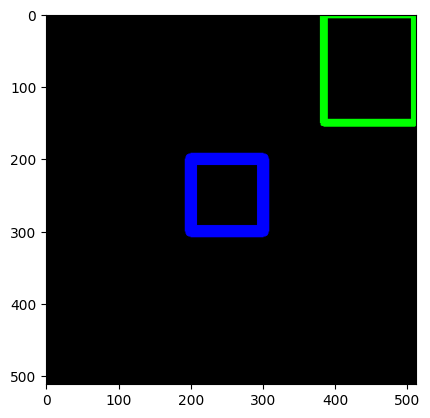

In [23]:
# Menggambar persegi panjang kedua pada citra black_img menggunakan OpenCV
# pt1 = (200, 200) -> koordinat titik pojok kiri atas persegi panjang
# pt2 = (300, 300) -> koordinat titik pojok kanan bawah persegi panjang
# color = (0, 0, 255) -> warna persegi panjang merah (format RGB)
# thickness = 15 -> ketebalan garis persegi panjang
cv.rectangle(black_img, pt1=(200, 200), pt2=(300, 300), color=(0, 0, 255), thickness=15)

# Menampilkan citra setelah digambar persegi panjang kedua
plt.imshow(black_img)

Tahap selanjutnya ditambah menambahkan bentuk lingkaran sesuai radius yang
tertulis pada kode program.

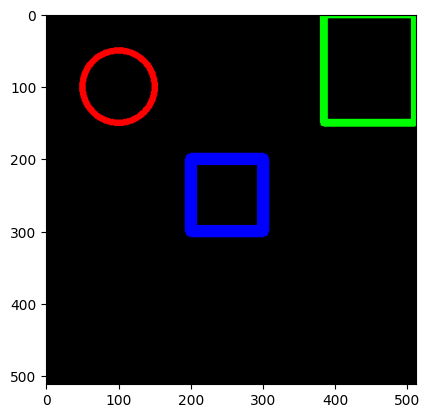

In [24]:
# Menggambar lingkaran pada citra black_img menggunakan OpenCV
# center = (100, 100) -> koordinat titik pusat lingkaran
# radius = 50 -> jari-jari lingkaran dalam piksel
# color = (255, 0, 0) -> warna lingkaran biru (format RGB)
# thickness = 8 -> ketebalan garis lingkaran; jika -1 maka lingkaran terisi penuh
cv.circle(black_img, center=(100, 100), radius=50, color=(255, 0, 0), thickness=8)

# Menampilkan citra setelah lingkaran digambar
plt.imshow(black_img)

Kemudian dilakukan penambahan garis sesuai koordinat pt1 dan pt2 sebagai berikut.

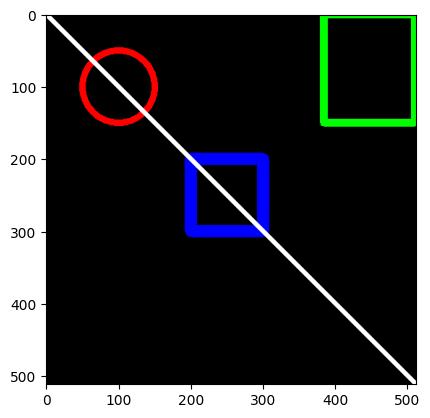

In [25]:
# Menggambar garis pada citra black_img menggunakan OpenCV
# pt1 = (0,0) -> titik awal garis (pojok kiri atas citra)
# pt2 = (512,512) -> titik akhir garis (pojok kanan bawah citra)
# color = (255,255,255) -> warna garis putih (format RGB)
# thickness = 5 -> ketebalan garis
cv.line(black_img, pt1=(0,0), pt2=(512,512), color=(255,255,255), thickness=5)

# Menampilkan citra setelah garis digambar
plt.imshow(black_img)

Penambahan text dengan font yang telah tertulis dengan ukuran yang sudah
ditentukan.

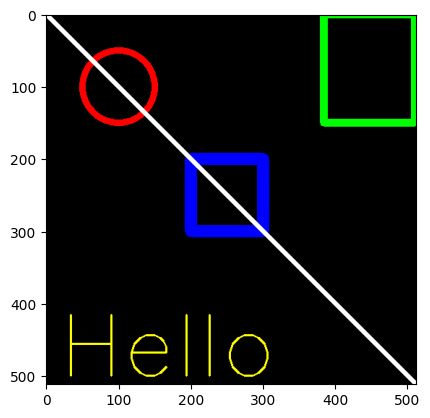

In [26]:
# Menentukan jenis font bawaan OpenCV
# cv.FONT_HERSHEY_SIMPLEX adalah font sederhana bergaya sans-serif
font = cv.FONT_HERSHEY_SIMPLEX

# Menuliskan teks "Hello" pada citra black_img
# text = 'Hello' -> teks yang akan ditampilkan
# org = (18,500) -> posisi kiri bawah teks pada citra (x=18, y=500)
# fontFace = font -> jenis font yang digunakan (diambil dari variabel 'font')
# fontScale = 4 -> ukuran skala teks (semakin besar, semakin besar hurufnya)
# color = (255,255,0) -> warna teks kuning (R=255, G=255, B=0)
# thickness = 2 -> ketebalan garis huruf
# lineType = cv.LINE_AA -> tipe garis antialiasing, membuat tepi huruf lebih halus
cv.putText(
    black_img,
    text='Hello',
    org=(18, 500),
    fontFace=font,
    fontScale=4,
    color=(255,255,0),
    thickness=2,
    lineType=cv.LINE_AA
)

# Menampilkan citra setelah teks ditambahkan
plt.imshow(black_img)

Pembuatan black image kembali dilakukan dengan tipe data int32

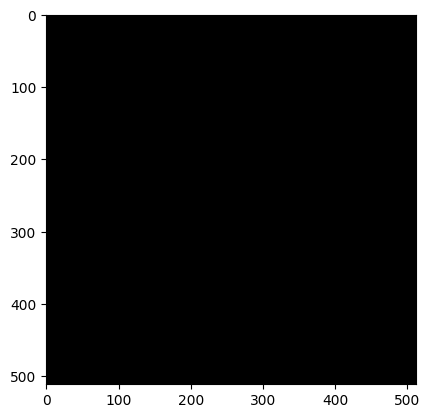

In [27]:
# Membuat array NumPy dengan ukuran 512x512 piksel dan 3 channel (RGB)
# Semua nilai awalnya nol → menghasilkan citra hitam
# dtype=np.int32 artinya setiap piksel disimpan dalam integer 32-bit
black_img2 = np.zeros(shape=(512, 512, 3), dtype=np.int32)

# Menampilkan citra hitam tersebut menggunakan matplotlib
plt.imshow(black_img2)

Berikut adalah kode program untuk inisialisasi NumPy array dengan tipe data int32

In [28]:
# Membuat array NumPy berisi koordinat titik-titik (vertices) poligon
# Koordinat ditulis dalam format (x, y)
# dtype=np.int32 -> tipe data integer 32-bit (disyaratkan oleh fungsi OpenCV seperti cv.polylines)
vertices = np.array([
    [100, 300],   # titik pertama
    [200, 200],   # titik kedua
    [400, 300],   # titik ketiga
    [200, 400]    # titik keempat
], dtype=np.int32)

# Menampilkan array vertices
vertices

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

Array tersebut kemudian di reshape sebagai berikut


In [29]:
# Mengubah bentuk (reshape) array vertices agar sesuai dengan format yang dibutuhkan OpenCV
# (-1, 1, 2) artinya:
#   -1 -> biarkan NumPy hitung jumlah titik otomatis
#    1 -> setiap titik dibungkus dalam array terpisah
#    2 -> setiap titik punya 2 koordinat (x, y)
pts = vertices.reshape((-1, 1, 2))

# Menampilkan hasil reshape
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

Penambahan polyline pada black image kedua yang telah dibuat.

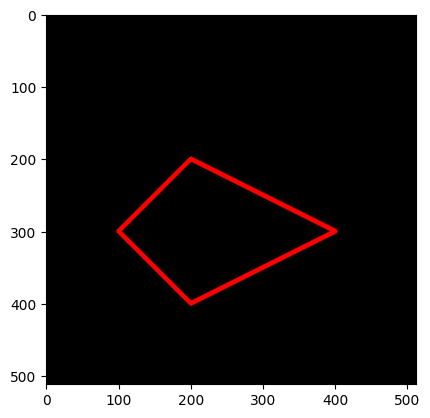

In [30]:
# Menggambar poligon pada citra black_img2
# black_img2 -> kanvas hitam yang sudah dibuat sebelumnya
# [pts] -> kumpulan titik-titik poligon dalam format yang sesuai (hasil reshape)
# isClosed=True -> poligon ditutup otomatis (titik terakhir terhubung ke titik pertama)
# color=(255,0,0) -> warna garis biru (format RGB)
# thickness=5 -> ketebalan garis poligon
cv.polylines(black_img2, [pts], isClosed=True, color=(255,0,0), thickness=5)

# Menampilkan citra setelah poligon digambar
plt.imshow(black_img2)